## Comparison of Lasso Factorial Selection with Forward Selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import factorial_model as fm
import matplotlib.pyplot as plt

### Factorial model with k=4

In [3]:
model_k4 = fm.FactorialModel(
    n=1000,
    k=4,
    degree=4,
    sigma=0.1,
    sparsity=0.5,
    seed=0,
)

In [4]:
# Fit and evaluated Lasso model
model_k4.sample_and_split_data(contrast_coding=True)
model_k4.fit_lasso()
model_k4.predict()
model_k4.compute_mse()
print(model_k4.mse)

0.009808250286609754


### Factorial model with k=8

In [5]:
model_k8 = fm.FactorialModel(
    n=1000,
    k=8,
    degree=8,
    sigma=0.1,
    sparsity=0.5,
    seed=0,
)

In [6]:
# Fit and evaluated Lasso model
model_k8.sample_and_split_data(contrast_coding=True)
model_k8.fit_lasso()
model_k8.predict()
model_k8.compute_mse()
print(model_k8.mse)

0.01485998816480604


### Factorial model with k=12

In [7]:
model_k12 = fm.FactorialModel(
    n=1000,
    k=12,
    degree=12,
    sigma=0.1,
    sparsity=0.5,
    seed=0,
)

In [8]:
# Fit and evaluated Lasso model
model_k12.sample_and_split_data(contrast_coding=True)
model_k12.fit_lasso()
model_k12.predict()
model_k12.compute_mse()
print(model_k12.mse)

0.9699323542962434


### Validate theoretical lower bound on number of observations

- General bound: $m \geq s \log n$
- Looser bound: $m \geq s \log (en/s)$

where $m$ = number of observations, $s$ = number of nonzero coefficients (sparse_count), $n = 2^k$

In [9]:
num_observations = np.arange(20, 2001, 20)
num_treatments = 8
percent_sparsity = 0.5
sparse_count = (1 - percent_sparsity) * (2 ** num_treatments)
general_bound = sparse_count * np.log(2 ** num_treatments)
looser_bound = sparse_count * np.log(np.exp(1) * (2 ** num_treatments) / sparse_count)

In [10]:
mse_over_num_obs = []
for n in num_observations:
    model = fm.FactorialModel(
        n=n,
        k=num_treatments,
        degree=num_treatments,
        sigma=0.1,
        sparsity=percent_sparsity,
        seed=0,
    )

    # Fit and evaluated Lasso model
    model.sample_and_split_data(contrast_coding=True)
    model.fit_lasso()
    model.predict()
    model.compute_mse()
    mse_over_num_obs.append(model.mse)
    print(f'n={n}, mse={model.mse}')

n=20, mse=2.316376420232288
n=40, mse=0.8451381357326827
n=60, mse=0.44080980557405214
n=80, mse=0.7025350112111568
n=100, mse=1.0313419114272786
n=120, mse=0.7880388324504141
n=140, mse=0.7628976263703153
n=160, mse=0.5127120358932054
n=180, mse=0.5634323161491832
n=200, mse=0.3771957751852324
n=220, mse=0.5222817213461134
n=240, mse=0.7161183906928815
n=260, mse=0.5197367007644643
n=280, mse=0.39841102610396995
n=300, mse=0.30144262990766024
n=320, mse=0.23692498856584696
n=340, mse=0.2889156873208374
n=360, mse=0.14980801272236524
n=380, mse=0.2419216921361885
n=400, mse=0.1515402185387516
n=420, mse=0.0644262485716726
n=440, mse=0.07104180221186444
n=460, mse=0.08615647646922589
n=480, mse=0.054895105701788294
n=500, mse=0.04783019600884723
n=520, mse=0.02151710212609527
n=540, mse=0.03739312678413461
n=560, mse=0.020748355723821523
n=580, mse=0.01672560694643309
n=600, mse=0.015357981718194063
n=620, mse=0.015585065069704763
n=640, mse=0.017020336647316083
n=660, mse=0.02416441741

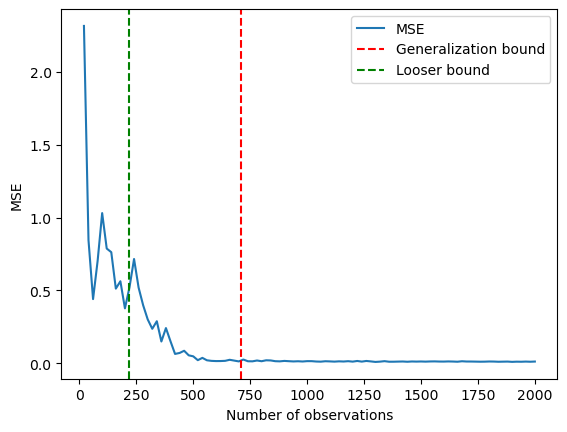

In [11]:
# Plot the results
plt.plot(num_observations, mse_over_num_obs, label="MSE")
plt.axvline(general_bound, color="red", linestyle="--", label="Generalization bound")
plt.axvline(looser_bound, color="green", linestyle="--", label="Looser bound")
plt.xlabel("Number of observations")
plt.ylabel("MSE")
plt.legend()
plt.show()

### Forward selection